In [1]:
# import stuff here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
!pip install bioinfokit
from bioinfokit.analys import stat

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.7/87.7 kB 1.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for bioinfokit: filename=bioinfokit-2.1.3-py3-none-any.whl size=59056 sha256=dbab977cc35b66fe513f7379dc0f0adac3af2fb1c5a77d599b4959b8e602e11f
  Stored in directory: /root/.cache/pip/wheels/ac/67/a7/4e0b4172d5415933127e819d7d7080ae08a6220949ad2f6de5
Successfully built bioinfokit


In [2]:
# Connect my google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
A2_data = pd.read_excel('/content/drive/MyDrive/INF 2178/INF2178_A2_data.xlsx', sheet_name=0) #load the data, except the explanation sheet
A2_data.head()

,_id,LOC_ID,LOC_NAME,AUSPICE,ADDRESS,PCODE,ward,bldg_type,BLDGNAME,IGSPACE,TGSPACE,PGSPACE,KGSPACE,SGSPACE,TOTSPACE,subsidy,cwelcc_flag
0,1,1013,Lakeshore Community Child Care Centre,Non Profit Agency,101 SEVENTH ST,M8V 3B5,3,Public Elementary School,Seventh Street Public School,0,20,32,52,60,164,Y,Y
1,2,1014,Alternative Primary School Parent Group,Non Profit Agency,1100 SPADINA RD,M5N 2M6,8,Public Elementary School,North Preparatory Public School,0,0,12,26,45,83,Y,Y
2,3,1015,Cardinal Leger Child Care Centre (Scarborough),Non Profit Agency,600 MORRISH RD,M1C 4Y1,25,Catholic Elementary School,Cardinal Leger Catholic School,0,10,16,26,50,102,Y,Y
3,4,1016,George Brown - Richmond Adelaide Childcare Centre,Non Profit Agency,130 ADELAIDE ST W,M5H 3P5,10,Other,NaN,10,15,40,0,0,65,Y,Y
4,5,1017,Woodland Nursery School (Warden Woods Communit...,Non Profit Agency,1 FIRVALLEY CRT,M1L 1N8,20,High Rise Apartment,NaN,0,10,16,0,0,26,Y,Y


**One Way ANOVA**

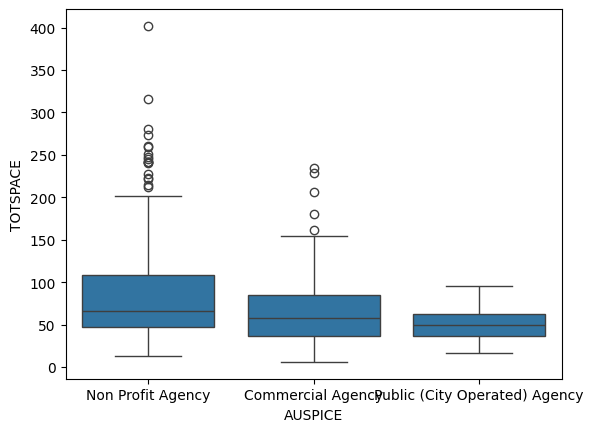

In [4]:
ax = sns.boxplot(x = 'AUSPICE', y = 'TOTSPACE', data = A2_data)
plt.show()

In [5]:
model  = ols('TOTSPACE ~ AUSPICE', data = A2_data).fit()
anova_table = sm.stats.anova_lm(model, typ = 2)
anova_table

,sum_sq,df,F,PR(>F)
AUSPICE,9.611211e+04,2.0,21.843051,5.057716e-10
Residual,2.332065e+06,1060.0,NaN,NaN


In [6]:
res = stat()
res.tukey_hsd(df = A2_data, res_var = 'TOTSPACE', xfac_var = 'AUSPICE', anova_model = 'TOTSPACE ~ AUSPICE')
res.tukey_summary

/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to 

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,Non Profit Agency,Commercial Agency,16.806538,3.993722,29.619353,4.356853,0.006071
1,Non Profit Agency,Public (City Operated) Agency,36.177966,8.673910,63.682022,4.369046,0.005901
2,Commercial Agency,Public (City Operated) Agency,19.371429,-10.141900,48.884757,2.180132,0.272554


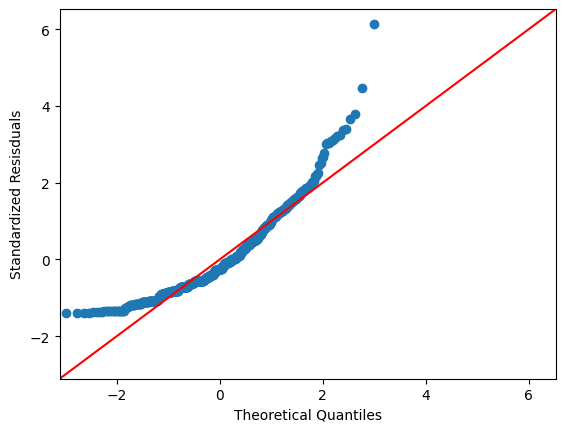

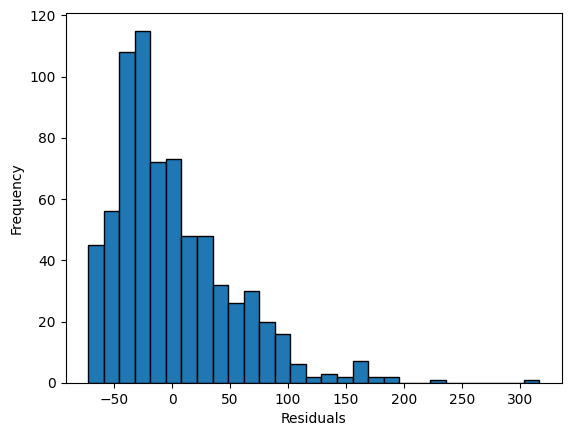

In [7]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

sm.qqplot(res.anova_std_residuals, line = '45')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Standardized Resisduals')
plt.show()

plt.hist(res.anova_model_out.resid, bins = 'auto', histtype = 'bar', ec = 'k')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

In [8]:
w, pvalue = stats.shapiro(model.resid)
print(w,pvalue)

0.901775598526001 1.4964898448030214e-25


In [9]:
res.levene(df = A2_data, res_var = 'TOTSPACE', xfac_var = 'AUSPICE')
res.levene_summary

,Parameter,Value
0,Test statistics (W),9.1994
1,Degrees of freedom (Df),2.0000
2,p value,0.0001


**Two Way ANOVA**

<Axes: xlabel='AUSPICE', ylabel='TOTSPACE'>

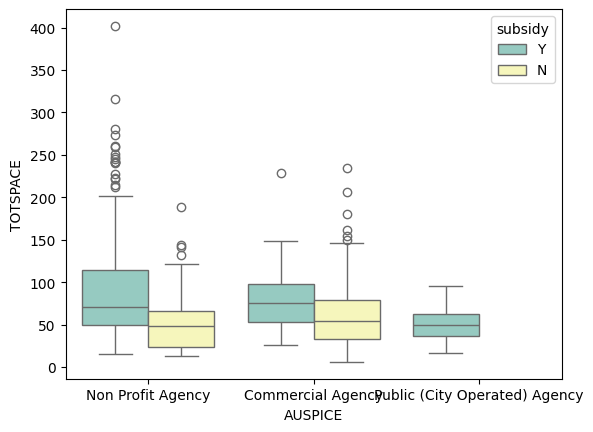

In [10]:
sns.boxplot(x = 'AUSPICE', y = 'TOTSPACE', hue = 'subsidy', data = A2_data, palette = 'Set3')

In [17]:
model = ols('TOTSPACE ~ C(AUSPICE) + C(subsidy) +C(AUSPICE):C(subsidy)', data = A2_data).fit()
anova_table = sm.stats.anova_lm(model, typ = 2)
anova_table

,sum_sq,df,F,PR(>F)
C(AUSPICE),8.567996e+03,2.0,2.057586,1.282730e-01
C(subsidy),8.352744e+04,1.0,40.117876,3.529094e-10
C(AUSPICE):C(subsidy),5.603445e+04,2.0,13.456555,1.694282e-06
Residual,2.202809e+06,1058.0,NaN,NaN


In [12]:
res = stat()
res.anova_stat(df = A2_data, res_var = 'TOTSPACE', anova_model = 'TOTSPACE ~ C(AUSPICE) + C(subsidy) +C(AUSPICE):C(subsidy)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(AUSPICE),2.0,8.567996e+03,4283.998054,2.057586,1.282730e-01
C(subsidy),1.0,8.352744e+04,83527.441787,40.117876,3.529094e-10
C(AUSPICE):C(subsidy),2.0,5.603445e+04,28017.227037,13.456555,1.694282e-06
Residual,1058.0,2.202809e+06,2082.050461,NaN,NaN


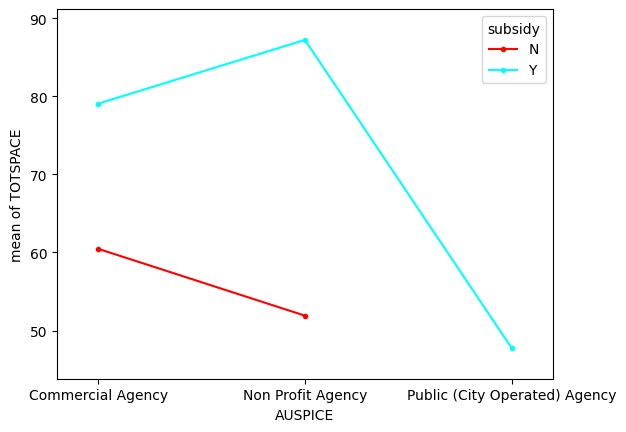

In [13]:
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt
fig = interaction_plot(x = A2_data['AUSPICE'], trace = A2_data['subsidy'], response = A2_data['TOTSPACE'])
plt.show()

In [14]:
res.tukey_hsd(df = A2_data, res_var = 'TOTSPACE', xfac_var = 'AUSPICE', anova_model = 'TOTSPACE ~ C(AUSPICE) + C(subsidy) +C(AUSPICE):C(subsidy)')
res.tukey_summary

/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to 

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,Non Profit Agency,Commercial Agency,16.806538,4.406270,29.206805,4.501830,0.004333
1,Non Profit Agency,Public (City Operated) Agency,36.177966,9.559488,62.796444,4.514429,0.004205
2,Commercial Agency,Public (City Operated) Agency,19.371429,-9.191627,47.934484,2.252677,0.249650


In [15]:
res.tukey_hsd(df = A2_data, res_var = 'TOTSPACE', xfac_var = 'subsidy', anova_model = 'TOTSPACE ~ C(AUSPICE) + C(subsidy) +C(AUSPICE):C(subsidy)')
res.tukey_summary

/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1896: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 2, but rank is 1
  war

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,Y,N,34.121178,24.873006,43.36935,10.244062,0.001


In [16]:
res.tukey_hsd(df = A2_data, res_var = 'TOTSPACE', xfac_var = ['AUSPICE','subsidy'], anova_model = 'TOTSPACE ~ C(AUSPICE) + C(subsidy) +C(AUSPICE):C(subsidy)')
res.tukey_summary

/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:388: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  (df[xfac_var[1]] == ele2)].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:388: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  (df[xfac_var[1]] == ele2)].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:388: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,"(Non Profit Agency, Y)","(Non Profit Agency, N)",44.986164,25.584897,64.387430,9.370204,0.001000
1,"(Non Profit Agency, Y)","(Commercial Agency, Y)",0.145138,-28.465689,28.755965,0.020500,0.900000
2,"(Non Profit Agency, Y)","(Commercial Agency, N)",28.370552,11.192465,45.548638,6.674107,0.001000
3,"(Non Profit Agency, Y)","(Public (City Operated) Agency, Y)",40.752830,8.307960,73.197700,5.075887,0.004757
4,"(Non Profit Agency, Y)","(Public (City Operated) Agency, N)",0.000000,-inf,inf,0.000000,0.900000
5,"(Non Profit Agency, N)","(Commercial Agency, Y)",44.841026,11.398078,78.283974,5.418401,0.001921
6,"(Non Profit Agency, N)","(Commercial Agency, N)",16.615612,-7.775739,41.006963,2.752838,0.375729
7,"(Non Profit Agency, N)","(Public (City Operated) Agency, Y)",4.233333,-32.543302,41.009969,0.465169,0.900000
8,"(Non Profit Agency, N)","(Public (City Operated) Agency, N)",0.000000,-inf,inf,0.000000,0.900000
9,"(Commercial Agency, Y)","(Commercial Agency, N)",28.225414,-3.978752,60.429580,3.541836,0.124403
